# Q2 (Zoo)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.shape

(101, 18)

In [5]:
zoo.duplicated().sum()

0

In [6]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [9]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


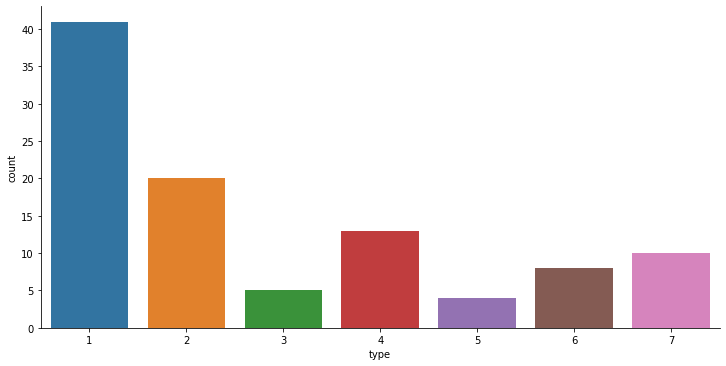

In [10]:
# use seaborn to plot the count of each 7 type
sns.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

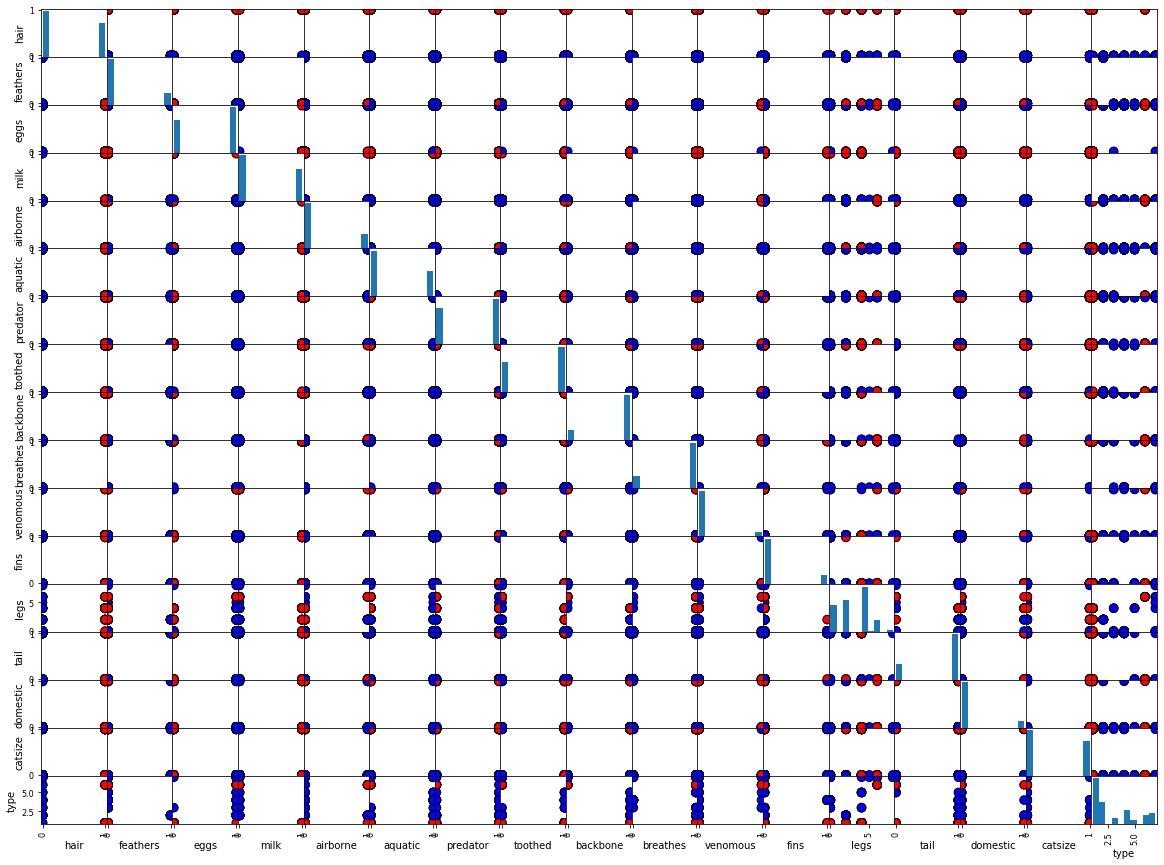

In [11]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,1:],
                                       c=color_list,
                                       figsize= [20,15],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

<AxesSubplot:>

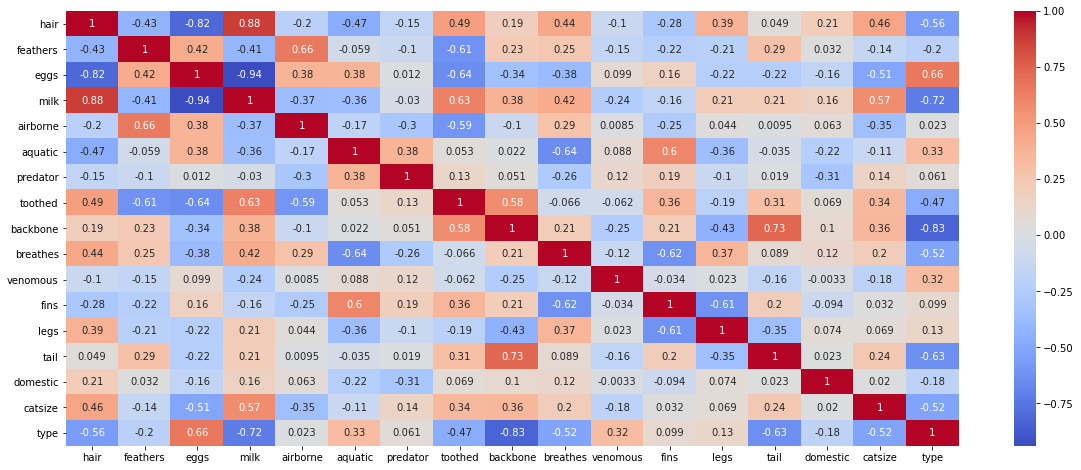

In [12]:
# correlation heat map to see the relation between different parameters
plt.figure(figsize=(20,8))
sns.heatmap(zoo.corr(),annot=True,cmap='coolwarm')

In [13]:
# lets to check how many animals are domestic
zoo.domestic.value_counts()

0    88
1    13
Name: domestic, dtype: int64

In [14]:
# species wise domestic and non-domestic animals
pd.crosstab(zoo.type, zoo.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


In [15]:
# lets see how many animals provides us milk
zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [16]:
# species wise milk and non-milk animals
pd.crosstab(zoo.type, zoo.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


Text(0.5, 1.0, 'Features for the Animals')

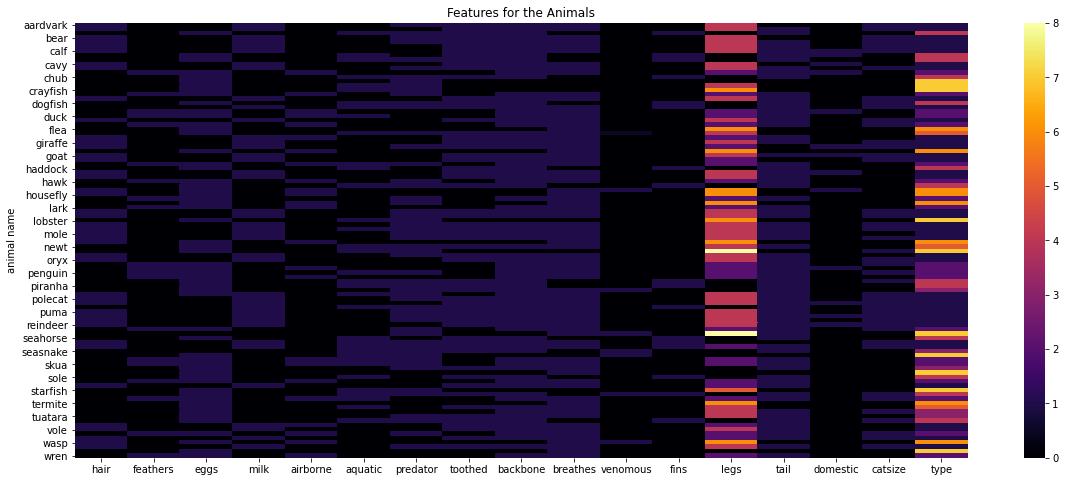

In [17]:
zoo_temp = zoo
zoo_temp = zoo_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (20,8) 
sns.heatmap(zoo_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

In [18]:
# we will be removing column animal_name as it does not help us in classification
zoos = zoo.drop('animal name', axis = 1)
zoos

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [19]:
# splitting data into X and y
X = zoos.drop('type', axis = 1)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
y = zoo['type']
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [21]:
# split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [22]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (75, 16)
Shape of x_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test:  (26,)


**building KNN model**

In [23]:
# fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# run prediction
y_pred = knn.predict(X_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [25]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [27]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


No handles with labels found to put in legend.


Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


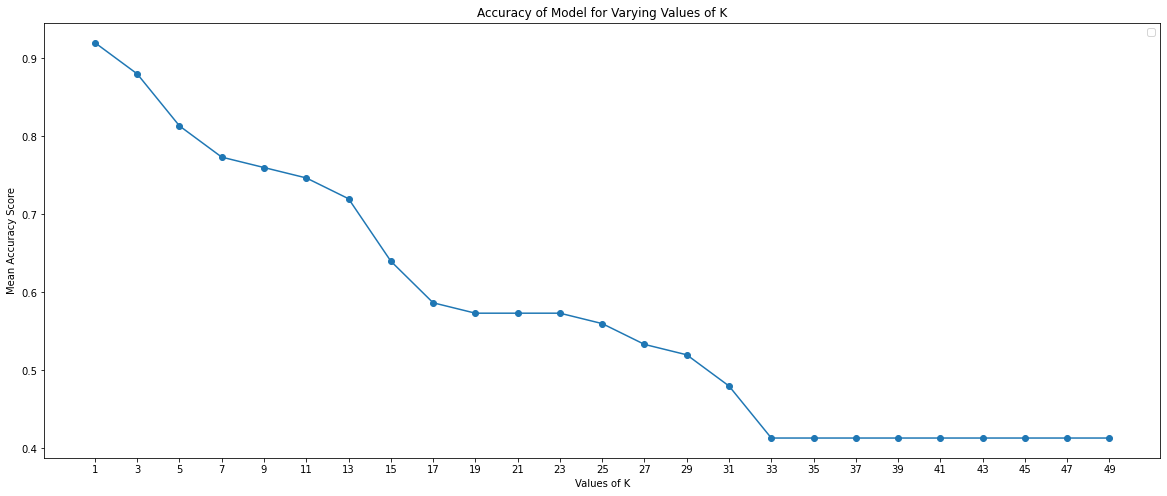

In [29]:
# get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=3)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=[20,8])
plt.plot(k_list,mean_scores, marker='o')
plt.legend()
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

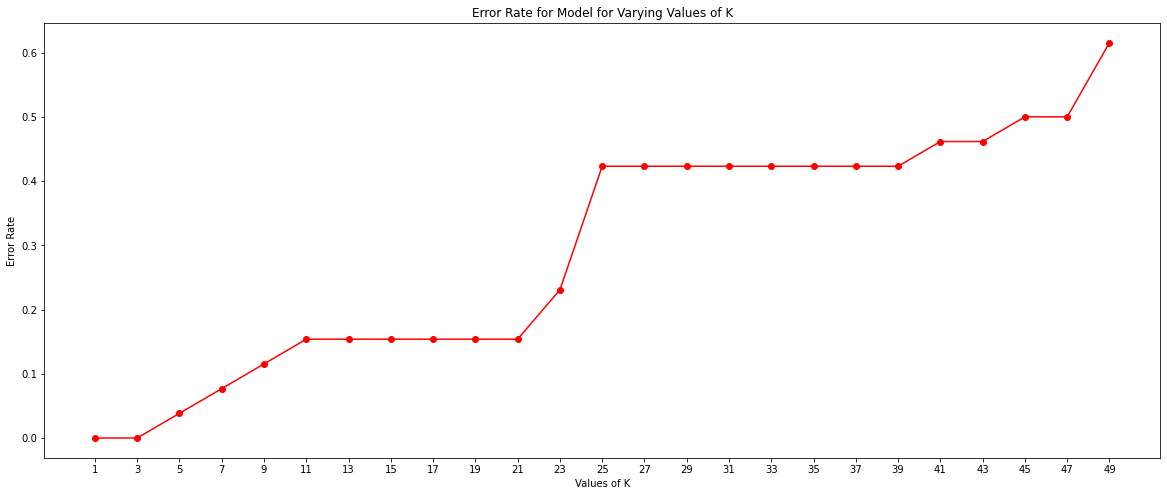

In [30]:
# plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (20, 6) 

plt.show()

In [36]:
zoos['has_legs'] = np.where(zoos['legs']>0,1,0)
zoos = zoos[['hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
               'venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
zoos

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,1,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7


In [37]:
# select columns to add to X and y sets
features = list(zoos.columns.values)
features.remove('legs')
features.remove('type')
X1 = zoos[features]
y1 = zoos['type']

In [39]:
# split X and y into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state = 0)


In [41]:
# fit k-nearest neighbors classifier with training sets for n = 5
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# run prediction
y1_pred = knn1.predict(X1_test)
y1_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 7, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [46]:
print(confusion_matrix(y1_test,y1_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  2]]


In [48]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.96        26
   macro avg       0.95      0.93      0.92        26
weighted avg       0.97      0.96      0.96        26



Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


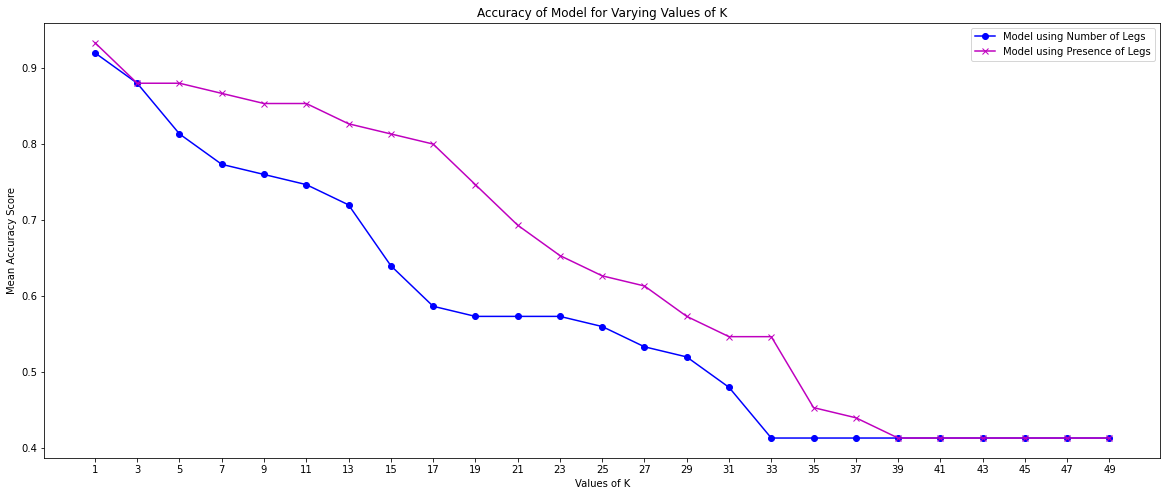

In [49]:
# get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores1 = []
accuracy_list1 = []
error_rate1 = []

for i in k_list:
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X1_train,y1_train)
    pred_i = knn1.predict(X1_test)
    score = cross_val_score(knn1,X1_train, y1_train,cv=3)
    mean_scores1.append(np.mean(score))
    error_rate1.append(np.mean(pred_i != y1_test))
    
plt.figure(figsize=[20,8])
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores1, color='m',marker='x', label='Model using Presence of Legs')
plt.legend()
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

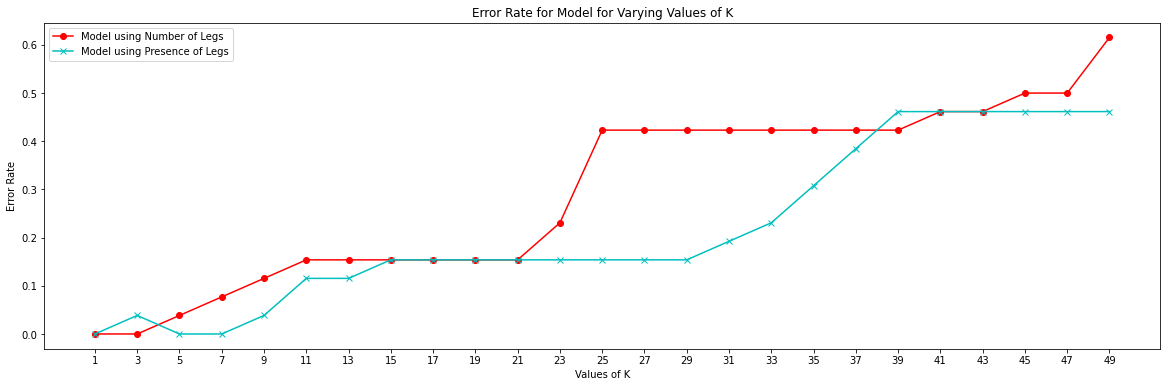

So interestingly, Replacing the feature legs with has_legs improved the accuracy of KNN models at every value where n >3. This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.


In [52]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list,error_rate1, color='c', marker = 'x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (20,6) 

plt.show()
print('So interestingly, Replacing the feature legs with has_legs improved the accuracy of KNN models at every value where n >3. This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.')